In [1]:
%matplotlib inline

import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import IPython

import sys

sys.path.append('.')

from niveau_nappe_core import *

sns.set()

In [2]:
sources = pd.read_csv('../data_collection/dataset_stations.csv', delimiter=',', index_col=0)
sources.head()

,bss,x,y,geometry,dpt,prof,alt,masse_eau,codes_bdlisa,CodeEH,InclusEH,EtatEH,NatureEH,MilieuEH,ThemeEH,OrigineEH
0,10402X0177/JOURDA,3.387383,43.336667,"{'type': 'Point', 'crs': {'type': 'name', 'pro...",34,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09654X0569/CNRP20,4.607080,43.848274,"{'type': 'Point', 'crs': {'type': 'name', 'pro...",30,18.0,12.0,"[""Alluvions du RhÃ´ne du confluent de la Duran...",712AJ05,712AJ05,712AJ,2,5.0,1,1.0,1.0
2,02581X0104/P18,2.543903,48.523357,"{'type': 'Point', 'crs': {'type': 'name', 'pro...",77,34.0,60.0,NaN,113AA01,113AA01,113AA,3,5.0,5,2.0,1.0
3,02913X0024/P,1.640479,48.401585,"{'type': 'Point', 'crs': {'type': 'name', 'pro...",28,12.0,153.4,['Multicouches craie du SÃ©no-turonien et calc...,107AA01,107AA01,107AA,3,5.0,5,2.0,1.0
4,00182X0031/P,2.258327,50.544651,"{'type': 'Point', 'crs': {'type': 'name', 'pro...",62,62.8,180.0,"[""Craie de l'Artois et de la vallÃ©e de la Lys""]",121BD01,121BD01,121BD,3,5.0,4,2.0,1.0


In [3]:
all_data = pd.read_csv('../data_collection/dataset_nomissing_linear.csv', delimiter=',', index_col='bss', parse_dates=['time'])
all_data.head()

,Unnamed: 0,time,tp,e,p
bss,,,,,
00061X0117/PZ1,1,2015-01-01,0.000015,-0.005951,17.43
00061X0117/PZ1,2,2015-01-02,0.000791,-0.012997,17.38
00061X0117/PZ1,3,2015-01-03,0.012880,-0.009395,17.31
00061X0117/PZ1,4,2015-01-04,0.000005,-0.007145,17.26
00061X0117/PZ1,5,2015-01-05,0.000072,-0.002743,17.19


In [4]:
piezo_without_data = set(sources.bss).difference(all_data.index)
print(len(piezo_without_data), 'over', sources.shape[0], 'Piezometers without data')

1481 over 2810 Piezometers without data


In [5]:
print(all_data.shape)

(3185613, 5)


In [6]:
all_data.describe()

,Unnamed: 0,tp,e,p
count,3.185613e+06,3.185613e+06,3.073977e+06,3.185613e+06
mean,1.592807e+06,2.365148e-03,-2.196965e-02,1.744470e+01
std,9.196074e+05,4.660794e-03,1.502670e-02,4.669572e+01
min,1.000000e+00,-2.235174e-08,-1.275453e-01,-2.010000e+01
25%,7.964040e+05,1.165084e-06,-3.268468e-02,3.480000e+00
50%,1.592807e+06,3.124950e-04,-1.955294e-02,8.770000e+00
75%,2.389210e+06,2.621830e-03,-9.353379e-03,2.248000e+01
max,3.185613e+06,1.504297e-01,1.311594e-02,1.151740e+03


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3185613 entries, 00061X0117/PZ1 to BSS002PTEJ/MONTFR
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Unnamed: 0  int64         
 1   time        datetime64[ns]
 2   tp          float64       
 3   e           float64       
 4   p           float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 145.8+ MB


In [8]:
code_bss = "00471X0095/PZ2013"
bss_id = "BSS000EBLL"

data = all_data.loc[code_bss].set_index('time')
data = data.sort_index()

data.head()

,Unnamed: 0,tp,e,p
time,,,,
2015-01-01,155806,0.000002,-0.002716,11.65
2015-01-02,155807,0.000968,-0.006637,11.61
2015-01-03,155808,0.009156,-0.001883,11.56
2015-01-04,155809,0.000030,-0.003922,11.53
2015-01-05,155810,0.000032,-0.001558,11.49


In [9]:
data.describe()

,Unnamed: 0,tp,e,p
count,2397.00000,2.397000e+03,2313.000000,2397.000000
mean,157004.00000,2.104166e-03,-0.019895,11.799458
std,692.09862,3.560893e-03,0.013659,2.502883
min,155806.00000,-2.235174e-08,-0.063269,5.850000
25%,156405.00000,1.803786e-05,-0.029545,9.810000
50%,157004.00000,4.635220e-04,-0.017830,12.310000
75%,157603.00000,2.717312e-03,-0.008171,13.780000
max,158202.00000,2.918985e-02,0.004677,15.950000


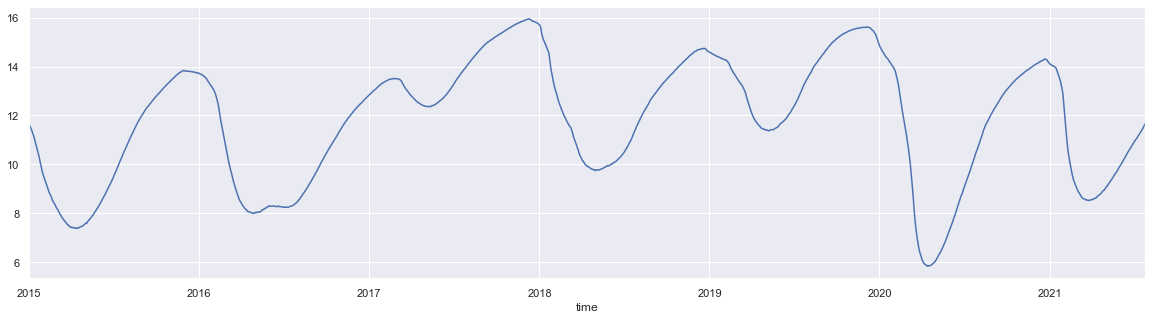

In [10]:
ax = data.p.plot(figsize=(20, 5))
ax.get_figure().savefig(f'Images/piezometre_{bss_id}.png')

<AxesSubplot:xlabel='time'>

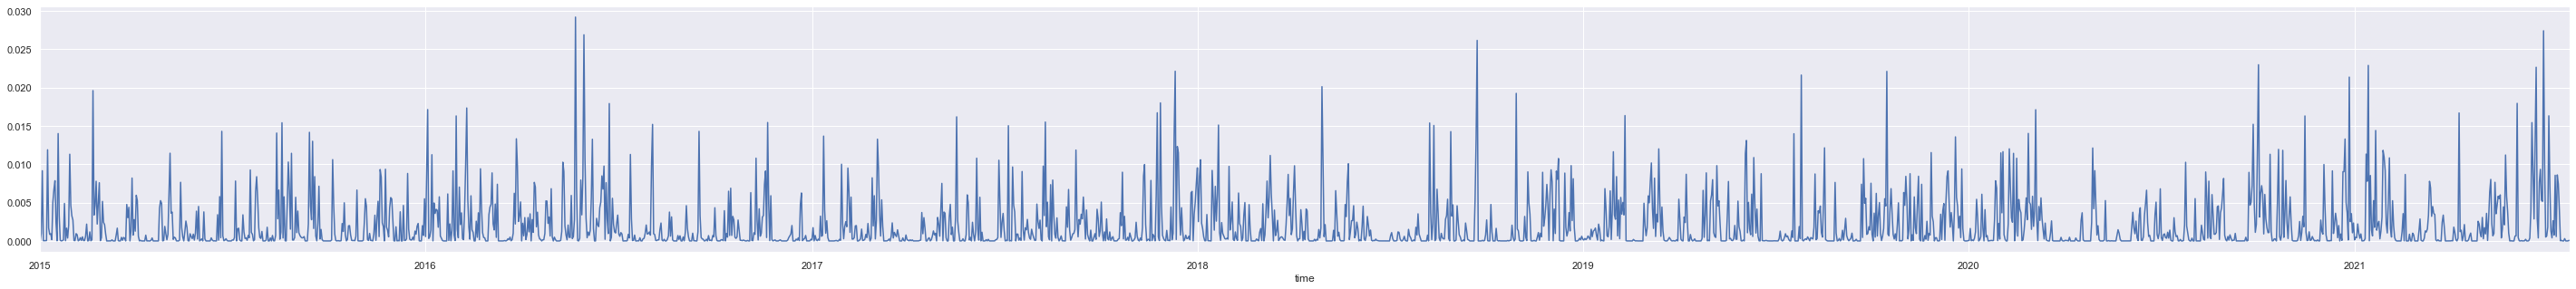

In [11]:
data.tp.plot(figsize=(50, 5))

<AxesSubplot:xlabel='time'>

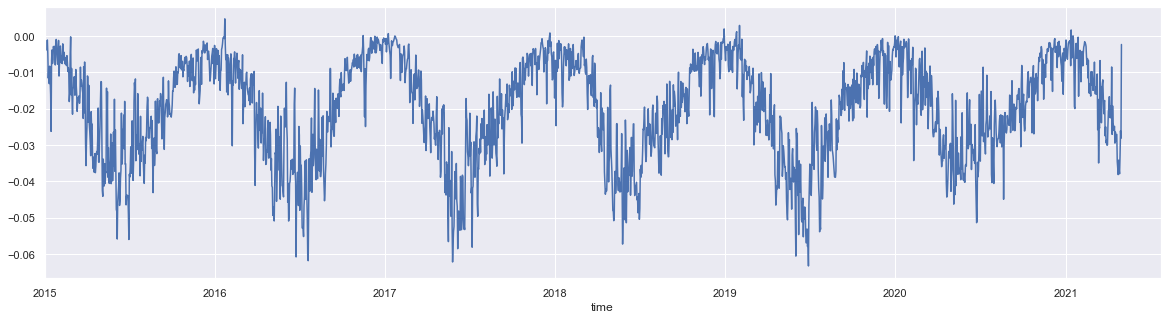

In [12]:
data.e.plot(figsize=(20, 5))

<AxesSubplot:>

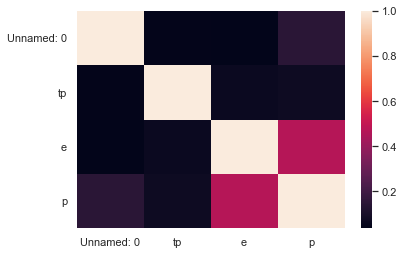

In [13]:
sns.heatmap(data.corr())

# Preprocessing

## Resampling the data to have a measure per day

In [14]:
data.index.to_series().diff()

time
2015-01-01      NaT
2015-01-02   1 days
2015-01-03   1 days
2015-01-04   1 days
2015-01-05   1 days
              ...  
2021-07-20   1 days
2021-07-21   1 days
2021-07-22   1 days
2021-07-23   1 days
2021-07-24   1 days
Name: time, Length: 2397, dtype: timedelta64[ns]

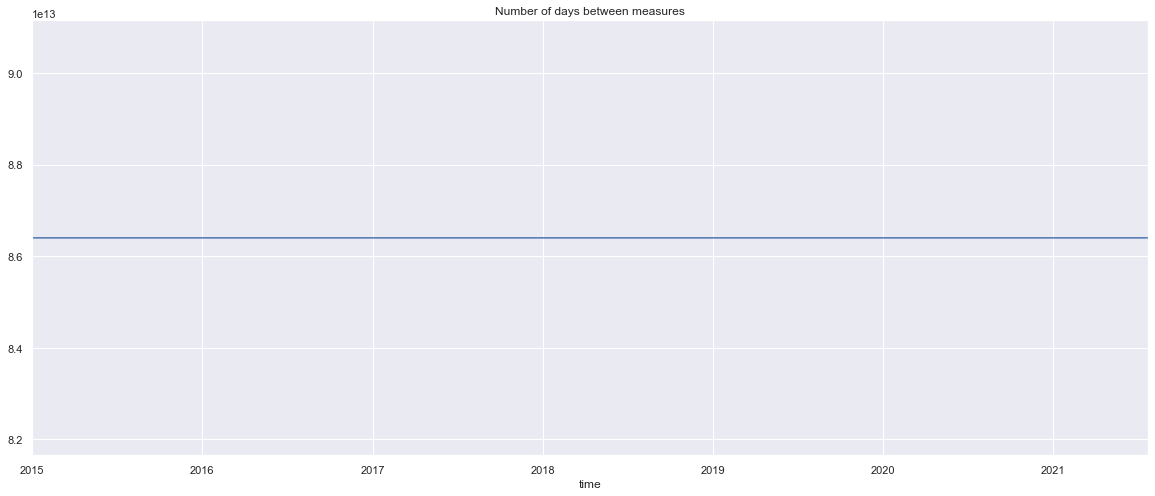

In [15]:
ax = data.index.to_series().diff().plot(figsize=(20, 8), title='Number of days between measures')
ax.get_figure().savefig(f'Images/intervalle_inter_messure_{bss_id}.png')

There are a lot of missing values before the year 2000. We are going to start at 01 Jan 2000

In [16]:
# select depth col
data = data[['p']]

# dropna
#data = data.dropna()
data.head()

,p
time,
2015-01-01,11.65
2015-01-02,11.61
2015-01-03,11.56
2015-01-04,11.53
2015-01-05,11.49


In [17]:
# start_date = '04-05-1970'
# start_date = '09-08-1984'
# start_date = '01-01-2000'
start_date = data.index.min()

data = data.loc[start_date:, :]

new_index = pd.date_range(start_date, data.index.max())

missing_index = new_index.difference(data.index)

print("There are", missing_index.size, "missing dates over ", new_index.size, " => ", round(100 * missing_index.size/new_index.size, 2), "% of data")

There are 0 missing dates over  2397  =>  0.0 % of data


In [18]:
# date feature
data = add_date_features(data)
data.head()

,p,year,month,quarter,weekday,day
time,,,,,,
2015-01-01,11.65,2015,1,1,3,1
2015-01-02,11.61,2015,1,1,4,2
2015-01-03,11.56,2015,1,1,5,3
2015-01-04,11.53,2015,1,1,6,4
2015-01-05,11.49,2015,1,1,0,5


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, RBF, ExpSineSquared

def build_imputer_model():
    
    kernel = Matern()

    scaler = StandardScaler()

    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

    gp = Pipeline([('sc', scaler), ('gpr', gpr)])

    return gp

In [20]:
if missing_index.size > 0:
    imputer = build_imputer_model()

    imputer.fit(data[['year', 'month', 'quarter', 'weekday', 'day']], data['p'])

    print('Score:', imputer.score(data[['year', 'month', 'quarter', 'weekday', 'day']], data['p']))

    data[['p']].plot(label='with missing', figsize=(20, 5))
    plt.show()

    missing_X = np.concatenate([missing_index.year.values.reshape((-1, 1)), 
                                 missing_index.month.values.reshape((-1, 1)), 
                                 missing_index.quarter.values.reshape((-1, 1)), 
                                 missing_index.weekday.values.reshape((-1, 1)), 
                                 missing_index.day.values.reshape((-1, 1))], axis=1)
    missing_X
    missing_y = imputer.predict(missing_X)
    
    cols = ['year', 'month', 'quarter', 'weekday', 'day', 'p']
    missing_X_y = pd.DataFrame(data=np.concatenate([missing_X, np.expand_dims(missing_y, axis=1)], axis=1), 
                               columns=cols, 
                               index=missing_index)

    data_no_missing = data[cols].append(missing_X_y)
    data_no_missing = data_no_missing.loc[new_index].sort_index()
    data_no_missing
else:
    data_no_missing = data

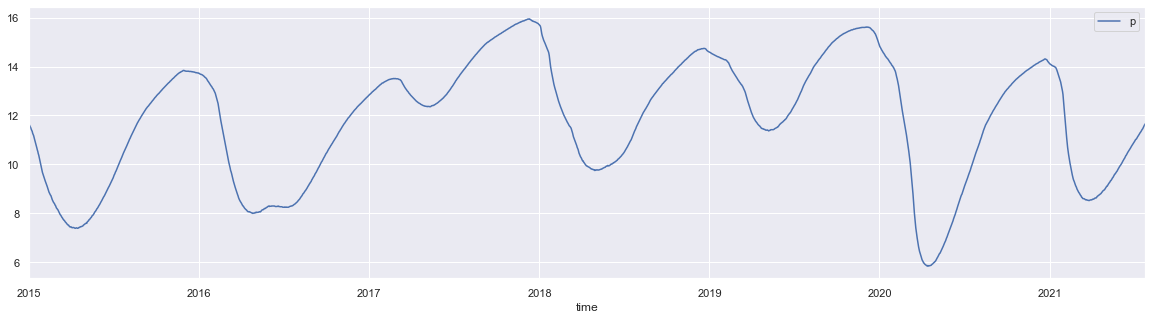

In [21]:
data_no_missing[['p']].plot(label='without missing', figsize=(20, 5))
plt.show()

### Feature engineering

- Extract day features: day of week, month, day of month
- Add temperature
- Add precipitation

In [22]:
# First and second degree diff
data_no_missing = add_derivate_features(data_no_missing, 'p')

data_no_missing.tail()

,p,year,month,quarter,weekday,day,diff_p,diff30_p,diff90_p,diff180_p,diff_diff_p
time,,,,,,,,,,,
2021-07-20,11.49,2021,7,3,1,20,0.04,0.91,2.67,-2.07,2.000000e-02
2021-07-21,11.53,2021,7,3,2,21,0.04,0.92,2.68,-1.97,-1.776357e-15
2021-07-22,11.58,2021,7,3,3,22,0.05,0.94,2.71,-1.86,1.000000e-02
2021-07-23,11.62,2021,7,3,4,23,0.04,0.95,2.72,-1.75,-1.000000e-02
2021-07-24,11.65,2021,7,3,5,24,0.03,0.94,2.73,-1.63,-1.000000e-02


### Split dataset 

$70\%$ for training, $20\%$ for validation and $10\%$ for test

In [23]:
features = ['p', 'year', 'month', 'quarter', 'weekday', 'day', 'diff_p', 'diff30_p', 'diff90_p', 'diff180_p', 'diff_diff_p']

df = data_no_missing[features]

n_features = len(features)

n = df.shape[0]

len_test = 93

train_df = df[:-len_test]

test_df = df[-len_test:]

print('Train shape:', train_df.shape)
print('Test shape:', test_df.shape)
print('Number of observations:', n) 
print('Features:', features, 'number:', n_features)

Train shape: (2304, 11)
Test shape: (93, 11)
Number of observations: 2397
Features: ['p', 'year', 'month', 'quarter', 'weekday', 'day', 'diff_p', 'diff30_p', 'diff90_p', 'diff180_p', 'diff_diff_p'] number: 11


## Data normalization

To do when working with more than one feature

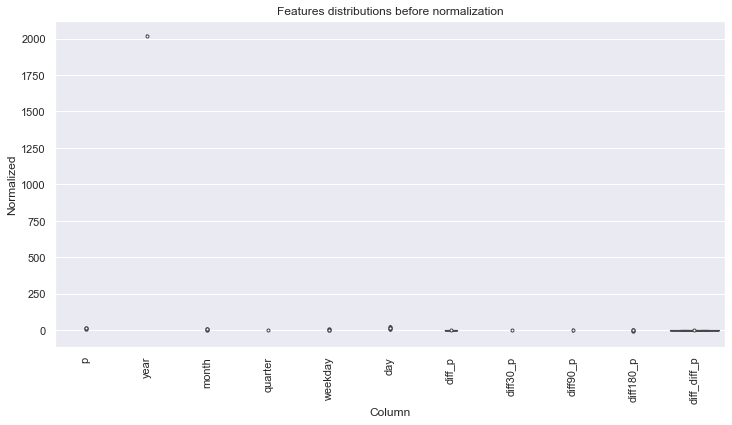

In [24]:
df_tmp = df.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_tmp)
ax.set_xticklabels(df.keys(), rotation=90)
#ax.set_yscale('log')
ax.set_title('Features distributions before normalization');

In [25]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

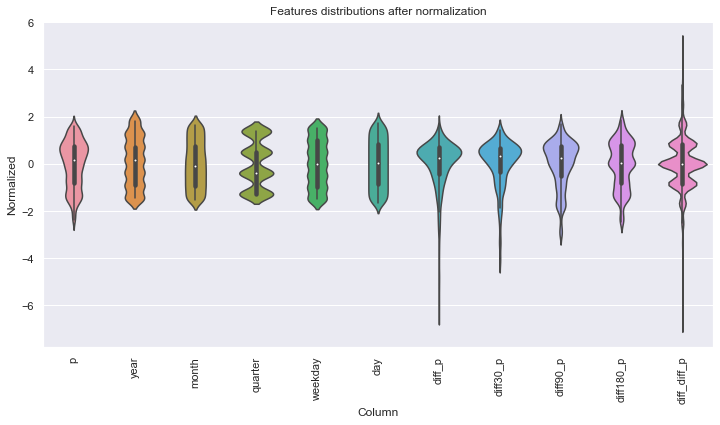

In [26]:
df_norm = (df - train_mean) / train_std
df_norm = df_norm.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_norm)
ax.set_xticklabels(df.keys(), rotation=90)
ax.set_title('Features distributions after normalization');

### Data windowing

In [27]:
# The horizon size
label_width = 93

# An history length of 
input_width = 100

# Number of feature values to predict at once
shift = label_width

# batch size
batch_size = 64


window = WindowGenerator(input_width=input_width, 
                         label_width=label_width, 
                         shift=shift,
                         batch_size=batch_size,
                         train_df=train_df, test_df=test_df, label_columns=['p'])

no_suffled_window = WindowGenerator(input_width=input_width, 
                         label_width=label_width, 
                         shift=shift,
                         batch_size=batch_size,
                         train_df=train_df, test_df=test_df, label_columns=['p'], shuffle=False)
print(window)

Total window size: 193
History length: 100
Horizon length: 93
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Label indices: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192]
Label column name(s): ['p']


In [28]:
def plot_forecast(model, name, label_index = None):
    last_history = np.expand_dims(test_df.tail(input_width).values, axis=0)
    
    forecast = model.predict(last_history).squeeze()
    
    if label_index is not None:
        forecast = forecast[:, label_index]
        
    forecast = forecast * train_std['p'] + train_mean['p']
    
    forecast_index = pd.date_range(start=test_df.index[-1], end=test_df.index[-1] + pd.Timedelta(label_width, unit='D'))[1:]

    series = df.p.append(pd.Series(data=forecast, index=forecast_index))

    series.plot(figsize=(20, 5), label='')
    plt.plot(forecast_index, forecast, label='forecast', lw=3)
    plt.legend()
    plt.title(name, fontsize=22)
    plt.show()

# Models

In [29]:
MAX_EPOCHS = 50
patience = 5

In [34]:
train_performance = {}
test_performance = {}
models = {}

## Model 

In [31]:
class RNForecaster(tf.keras.Model):
    def __init__(self, kernel_size, filters, label_width, n_blocks=2, use_batch_norm=False,**kwargs):
        super().__init__(**kwargs)
        self.kernel_size = kernel_size
        self.bn = use_batch_norm
        
        self.conv_init = tf.keras.layers.Conv1D(filters=filters, kernel_size=self.kernel_size, activation='relu', padding='same', name='conv_init')
        self.bn_init = tf.keras.layers.BatchNormalization(name='bn_init')
        
        self.convs = []
        self.bns = []
        self.adds = []
        
        for stage in range(n_blocks):
            conv = tf.keras.layers.Conv1D(filters=filters, kernel_size=self.kernel_size, activation='relu', padding='same', name=f"conv_{stage}")
            self.convs.append(conv)
                
            bn = tf.keras.layers.BatchNormalization(name=f"bn_{stage}")
            self.bns.append(bn)
                
            self.adds.append(tf.keras.layers.Add(name=f'add_{stage}'))
                
                
        self.flatten = tf.keras.layers.Flatten()
        self.dropout = tf.keras.layers.Dropout(0.3)
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units=label_width)
        self.reshape = tf.keras.layers.Reshape((label_width, -1))
        
    def call(self, inputs):
        out = self.conv_init(inputs)
        
        if self.bn:
            out = self.bn_init(out)
            
        for i in range(len(self.convs)):
            out_shortcut = out
            out = self.convs[i](out)
            out = self.bns[i](out)
            out = self.adds[i]([out, out_shortcut])
        
        out = self.flatten(out)
        
        out = self.dropout(out)
        out = self.dense1(out)        
        out = self.dense2(out)
        out = self.reshape(out)
        
        return out
    
    def build_graph(self, input_shape):
        x = tf.keras.layers.Input(shape=(input_shape))
        return tf.keras.models.Model(inputs=[x], outputs=self.call(x))


In [32]:
conv_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=7, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=label_width),
    tf.keras.layers.Reshape((label_width, -1))
], name='conv2')

In [78]:
CONV_WIDTH = 3
filters = 64
n_blocks = 2
use_bn = True

rnForecaster = RNForecaster(kernel_size=CONV_WIDTH, label_width=label_width, filters=filters, n_blocks=n_blocks, use_batch_norm=use_bn)

history = compile_and_fit(rnForecaster, window, patience=patience, epochs=MAX_EPOCHS)

train_performance['rnForecaster V0'] = rnForecaster.evaluate(window.train)
test_performance['rnForecaster V0'] = rnForecaster.evaluate(np.expand_dims(train_df[-input_width:].values, axis=0), np.expand_dims(test_df.values, axis=0))
models['rnForecaster'] = rnForecaster

1/1 [==============================] - 0s 12ms/step - loss: 1.0243


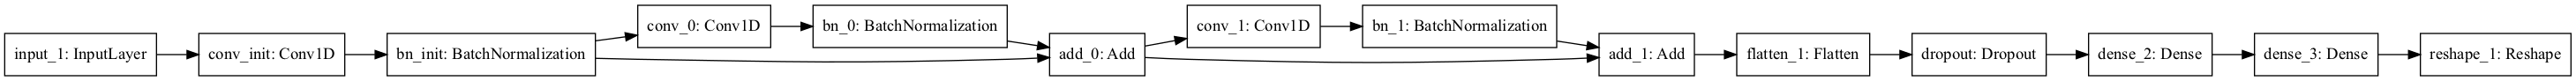

In [37]:
tf.keras.utils.plot_model(rnForecaster.build_graph(window.train.element_spec[0].shape[1:]), 'Images/RNForecaster.png', rankdir='LR')

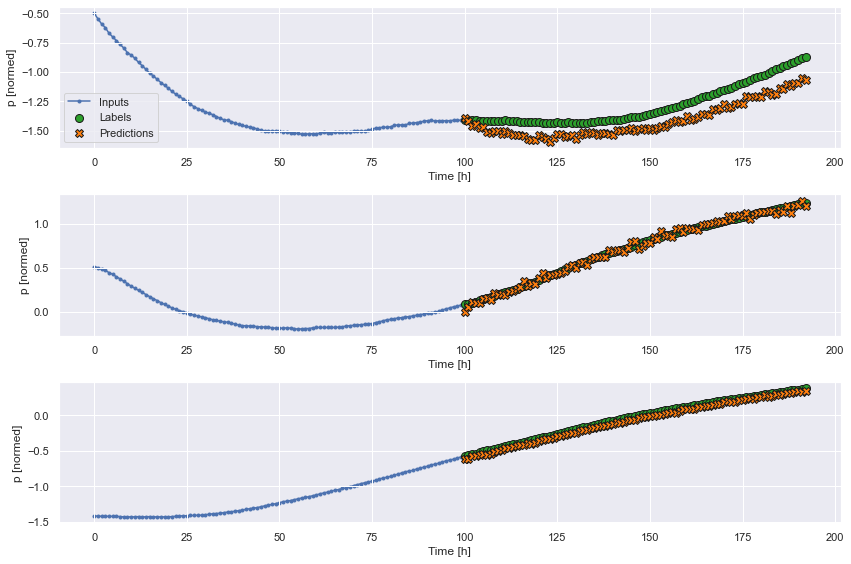

In [38]:
window.plot(rnForecaster, plot_col='p')

In [39]:
conv_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=7, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=label_width),
    tf.keras.layers.Reshape((label_width, -1))
], name='conv2')

history = compile_and_fit(conv_model2, window, patience=patience, epochs=MAX_EPOCHS)

train_performance['Conv2'] = conv_model2.evaluate(window.train)
test_performance['Conv2'] = conv_model2.evaluate(np.expand_dims(train_df[-input_width:].values, axis=0), np.expand_dims(test_df.values, axis=0))
models['conv2'] = conv_model2

1/1 [==============================] - 0s 91ms/step - loss: 1.3023


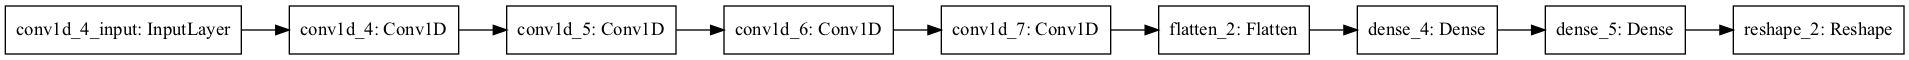

In [40]:
tf.keras.utils.plot_model(conv_model2, 'Images/Conv2.png', rankdir='LR')

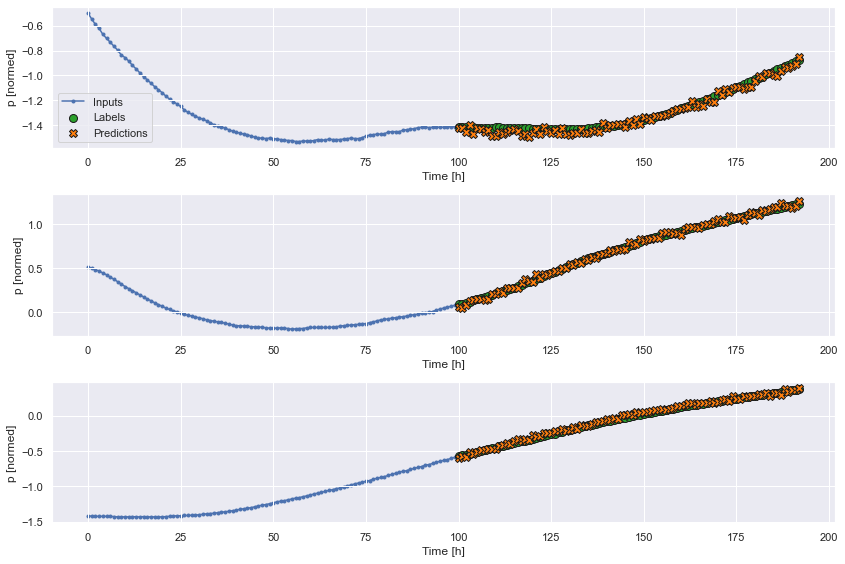

In [41]:
window.plot(conv_model2, plot_col='p')

In [42]:
conv_model3 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=7, activation='relu', padding='same'),
    tf.keras.layers.AveragePooling1D(3),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    tf.keras.layers.AveragePooling1D(3),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.AveragePooling1D(3),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.AveragePooling1D(3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=label_width),
    tf.keras.layers.Reshape((label_width, -1))
], name='conv3')

history = compile_and_fit(conv_model3, window, patience=patience, epochs=MAX_EPOCHS)

train_performance['Conv3'] = conv_model3.evaluate(window.train)
test_performance['Conv3'] = conv_model3.evaluate(np.expand_dims(train_df[-input_width:].values, axis=0), np.expand_dims(test_df.values, axis=0))
models['conv3'] = conv_model3

1/1 [==============================] - 0s 93ms/step - loss: 1.7951


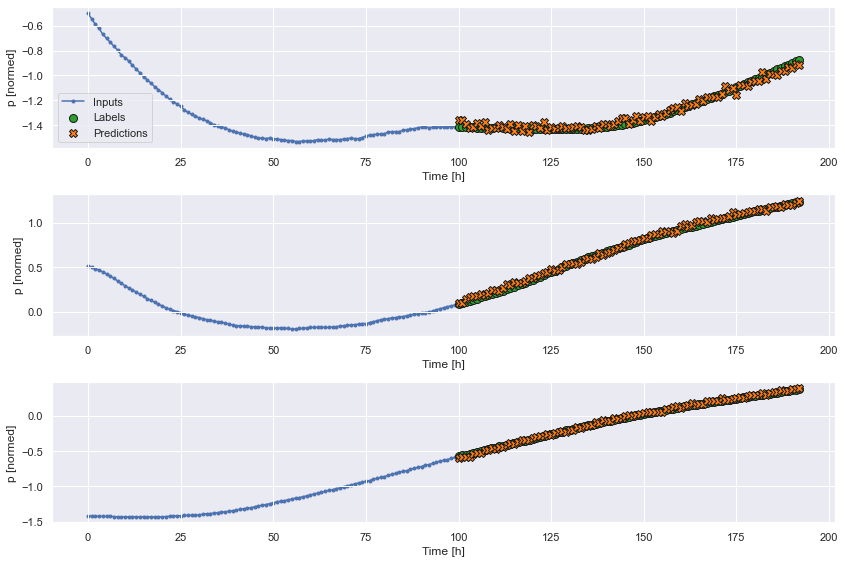

In [43]:
window.plot(conv_model3, plot_col='p')

In [44]:
conv_model4 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=256, kernel_size=7, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=128, kernel_size=7, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(units=label_width),
    tf.keras.layers.Reshape((label_width, -1))
], name='conv4')

history = compile_and_fit(conv_model4, window, patience=patience, epochs=MAX_EPOCHS)

train_performance['Conv4'] = conv_model4.evaluate(window.train)
test_performance['Conv4'] = conv_model4.evaluate(np.expand_dims(train_df[-input_width:].values, axis=0), np.expand_dims(test_df.values, axis=0))
models['conv4'] = conv_model4

1/1 [==============================] - 0s 94ms/step - loss: 1.6111


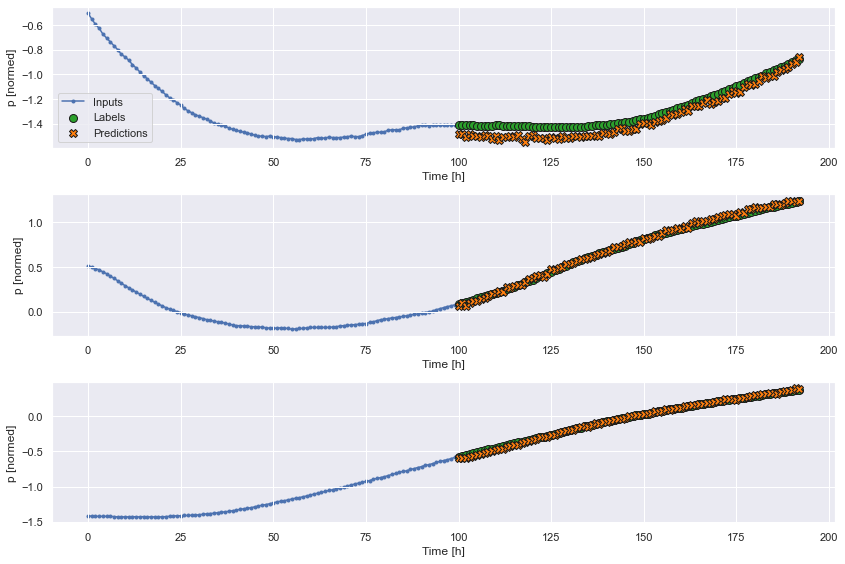

In [45]:
window.plot(conv_model4, plot_col='p')

In [47]:
lstm_model2 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=label_width),
    tf.keras.layers.Reshape((label_width, -1))
], name='lstm2')

history = compile_and_fit(lstm_model2, no_suffled_window, patience=patience, epochs=MAX_EPOCHS)

train_performance['LSTM 2'] = lstm_model2.evaluate(window.train)
test_performance['LSTM 2'] = lstm_model2.evaluate(np.expand_dims(train_df[-input_width:].values, axis=0), np.expand_dims(test_df.values, axis=0))
models['LSTM 2'] = lstm_model2

1/1 [==============================] - 0s 420ms/step - loss: 1.6210


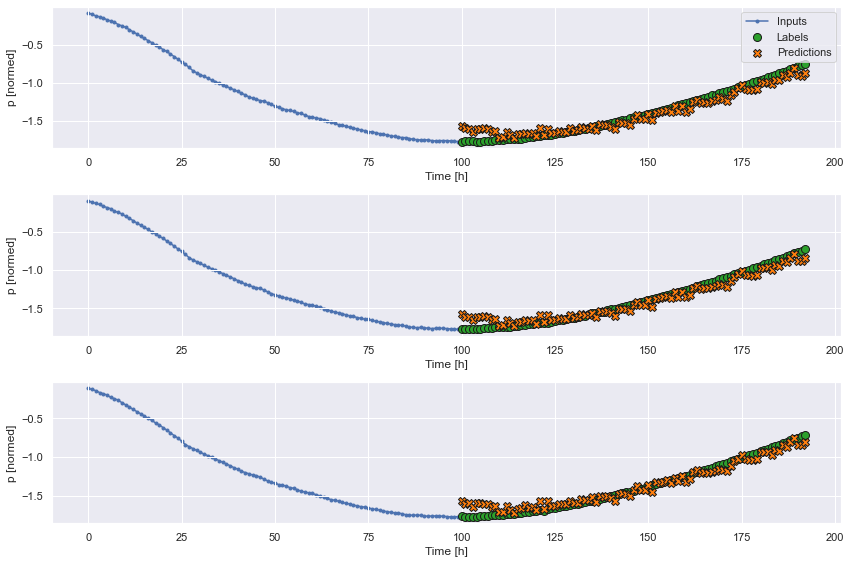

In [48]:
no_suffled_window.plot(lstm_model2, plot_col='p')

# Trying other models

In [182]:
from neuralprophet import NeuralProphet

neural_prophet_model = NeuralProphet()

train_data = train_df[['p']]
train_data = train_data.reset_index().rename(columns={'p': 'y', 'time': 'ds'})

neural_prophet_model.fit(train_data, freq='D')

future = neural_prophet_model.make_future_dataframe(train_data, periods=label_width)
neural_prophet_predictions = neural_prophet_model.predict(train_data.append(future))

train_performance['NeuralProphet'] = tf.keras.metrics.mean_squared_error(neural_prophet_predictions.yhat1[:-len_test], train_df.p).numpy()
test_performance['NeuralProphet'] = tf.keras.metrics.mean_squared_error(neural_prophet_predictions.yhat1[-len_test:], test_df.p).numpy()

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 147
INFO:NP.config:Auto-set epochs to 147


  0%|          | 0/268 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.72E-01, min: 1.20E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.72E-01, min: 1.20E+00


  0%|          | 0/268 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.86E-01, min: 1.91E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.86E-01, min: 1.91E+00


  0%|          | 0/268 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.17E-01, min: 8.13E-01
INFO:NP.utils_torch:lr-range-test results: steep: 1.17E-01, min: 8.13E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.55E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.55E-01
Epoch[147/147]: 100%|██████████| 147/147 [00:12<00:00, 11.97it/s, SmoothL1Loss=0.00276, MAE=0.211, RMSE=0.28, RegLoss=0] 


In [183]:
from prophet import Prophet

prophet_model = Prophet()
prophet_model.fit(train_data)

future = prophet_model.make_future_dataframe(periods=label_width)
prophet_predictions = prophet_model.predict(future)

train_performance['Prophet'] = tf.keras.metrics.mean_squared_error(prophet_predictions.yhat[:-len_test], train_df.p).numpy()
test_performance['Prophet'] = tf.keras.metrics.mean_squared_error(prophet_predictions.yhat[-len_test:], test_df.p).numpy()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [172]:
from mxnet import gluon
from gluonts.dataset.common import ListDataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx import Trainer
from gluonts.evaluation import make_evaluation_predictions
from gluonts.evaluation import Evaluator

FREQ = 'D'

train_ds = ListDataset(
    [{'target': train_df.p[:-len_test], 'start': '2015-01-01'}],
    freq=FREQ
)
# test dataset
test_ds = ListDataset(
    [{'target': train_df.append(test_df).p, 'start': '2015-01-01'}],
    freq=FREQ
)

deepar_estimator = DeepAREstimator(
        prediction_length=label_width,
        context_length=input_width,
        freq=FREQ,
        trainer=Trainer(
            epochs=MAX_EPOCHS,
            patience=patience,
            num_batches_per_epoch=batch_size)
    )

predictor = deepar_estimator.train(train_ds)

forecast_it, ts_it = make_evaluation_predictions(
        dataset=train_ds,  # test dataset
        predictor=predictor,  # predictor
    )

forecasts = list(forecast_it)
tss = list(ts_it)

evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=1)
train_performance['DeepAR'] = agg_metrics['MSE']

forecast_it, ts_it = make_evaluation_predictions(
        dataset=test_ds,  # test dataset
        predictor=predictor,  # predictor
    )

forecasts = list(forecast_it)
tss = list(ts_it)

evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=1)

test_performance['DeepAR'] = agg_metrics['MSE']

WARNING - (py.warnings._showwarnmsg) - /Users/michael/opt/miniconda3/envs/defiegc2021/lib/python3.9/site-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)

  return _shift_timestamp_helper(ts, ts.freq, offset)

Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


,train_loss,test_loss
rnForecaster V0,0.004132,1.024268
Conv2,0.000856,1.302251
Conv3,0.001829,1.795059
Conv4,0.001447,1.611079
LSTM 2,0.053211,1.621033
NeuralProphet,0.080490,0.158035
Prophet,0.085267,0.570219
DeepAR,0.001189,0.019035


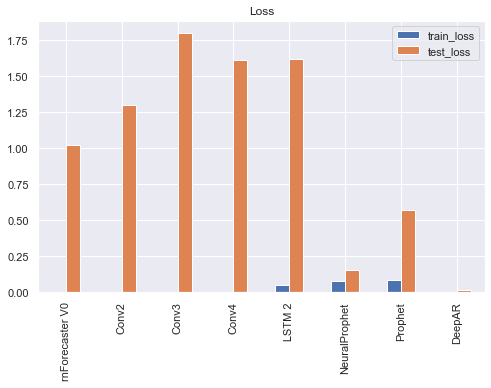

In [185]:
df_results = pd.DataFrame({'train_loss': train_performance, 'test_loss': test_performance})

df_results.plot(kind='bar', title='Loss', figsize=(8, 5));

df_results

## Ploting forecasts

In [85]:
for name, model in models.items():
    label_index = window.column_indices['p'] if 'AR' in name else None
    plot_forecast(model, name, label_index=label_index)

InvalidArgumentError:  Matrix size-incompatible: In[0]: [1,5952], In[1]: [6400,256]
	 [[node rn_forecaster/dense_2/Relu (defined at <ipython-input-31-11427ab7ec1c>:45) ]] [Op:__inference_predict_function_64265]

Function call stack:
predict_function
